<a href="https://colab.research.google.com/github/TruongChiDien/CS114.M11.KHCL/blob/main/Recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Package**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Máy học

/content/drive/MyDrive/Colab Notebooks/Máy học


# **Train on MNIST dataset**

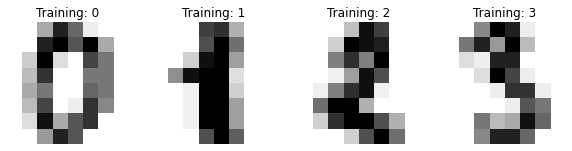

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [ ]:
X_test[0].shape

(64,)

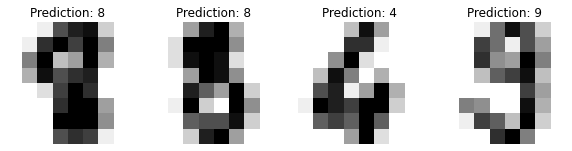

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


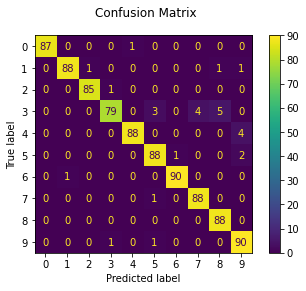

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# **Evaluate on Pain dataset**

In [ ]:
for i in range(9):
    img = cv2.imread('v2/' + str(i+1) + '.jpg', 0)
    img = np.abs(255 - img)//16
    img_rs = img.reshape(1, -1)
    plt.subplot(3, 3, i+1, title=f'Predict: {clf.predict(img_rs)[0]}')
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")

plt.show()

# **Evaluate on Webcam**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo('3.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **Evaluate on collective dataset**

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

In [ ]:
# Read data from drive

data_path = Path('Digit')

images = []
labels = []

for img_path in data_path.iterdir():
    if ('tr' not in str(img_path)):
        images.append(str(img_path))
        labels.append(int(img_path.stem[0]))

In [ ]:
def preprocess(img_path):
    img_ori = cv2.imread(img_path, 0)  # read image
    mean = np.mean(img_ori)
    img = cv2.filter2D(src=img_ori, ddepth=-1, kernel=kernel) # Sharpen
    (T, img) = cv2.threshold(img, mean*0.6, 255, cv2.THRESH_BINARY_INV) # Threshold 1

    img = cv2.resize(img, (8,8), interpolation=cv2.INTER_AREA) # Resize

    mean = np.mean(img)
    (T, img) = cv2.threshold(img, mean*1.4, 255, cv2.THRESH_BINARY) 
    img = img//16   # Convert value to 4 bit
    img_rs = img.reshape(1, -1)
    return img_rs

In [ ]:
def predict_webcam(file_name):
    img_ori = cv2.imread(file_name, 0)  # read image
    mean = np.mean(img_ori)
    img = cv2.filter2D(src=img_ori, ddepth=-1, kernel=kernel) # Sharpen
    (T, img) = cv2.threshold(img, mean*0.6, 255, cv2.THRESH_BINARY_INV) # Threshold 1

    img = cv2.resize(img, (8,8), interpolation=cv2.INTER_AREA) # Resize

    mean = np.mean(img)
    (T, img) = cv2.threshold(img, mean*1.4, 255, cv2.THRESH_BINARY) 
    img = img//16   # Convert value to 4 bit
    img_rs = img.reshape(1, -1)

    # Show original image
    plt.subplot(1, 2, 1, title='Original image')
    plt.imshow(img_ori, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.axis('off')

    # Show predict
    pred = clf.predict(img_rs)[0]
    plt.subplot(1, 2, 2, title=f'Predict: {pred}')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.axis('off')

    plt.show()
    return pred

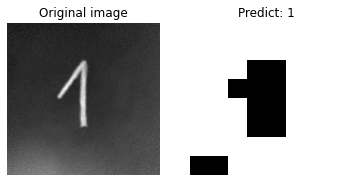

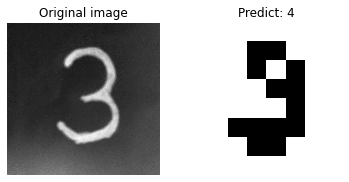

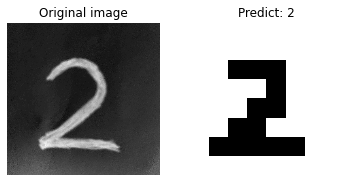

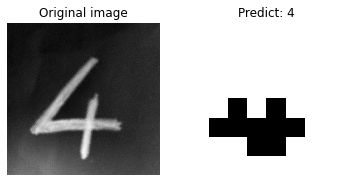

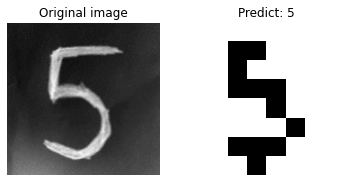

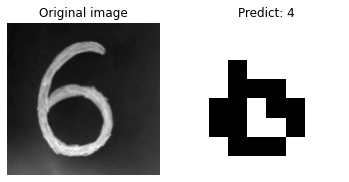

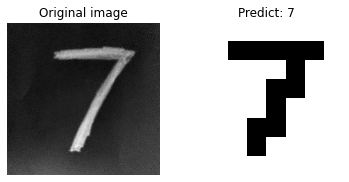

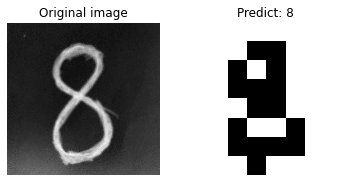

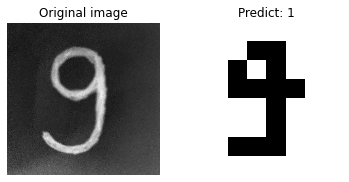

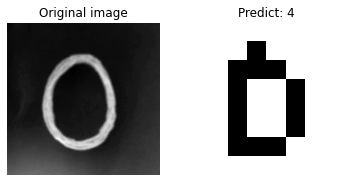

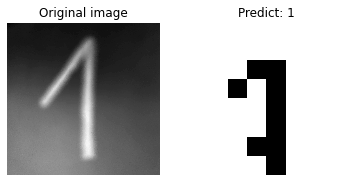

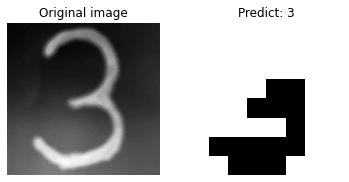

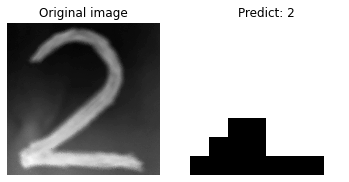

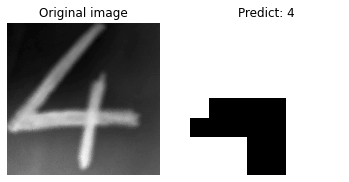

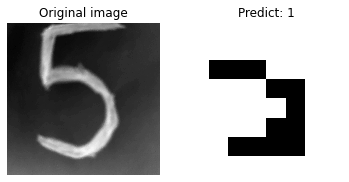

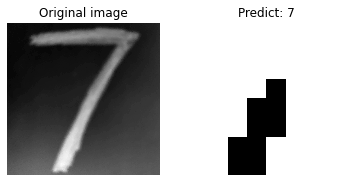

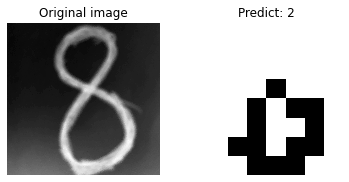

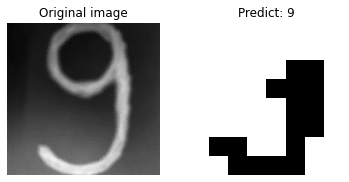

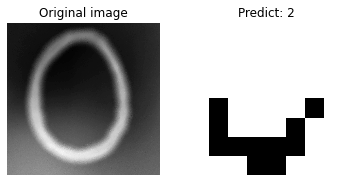

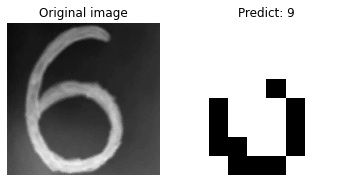

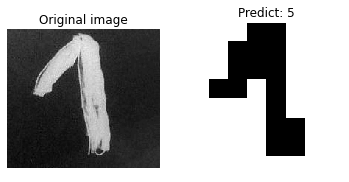

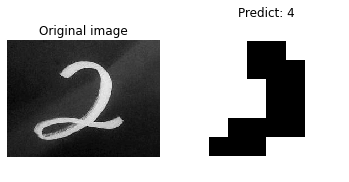

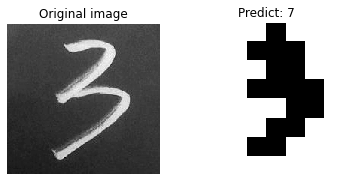

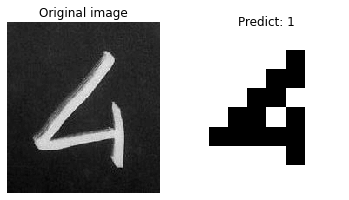

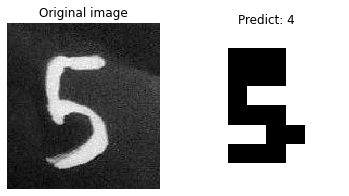

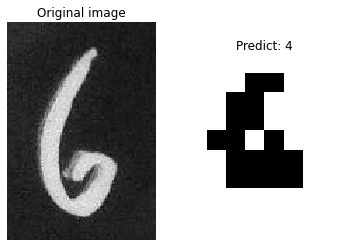

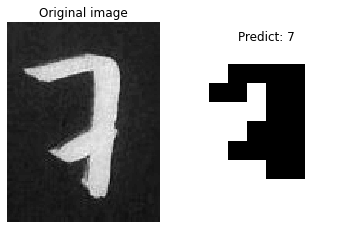

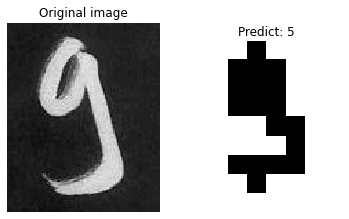

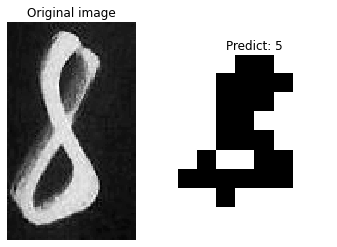

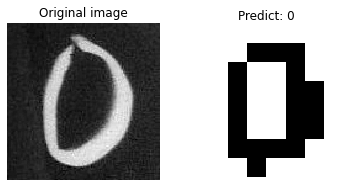

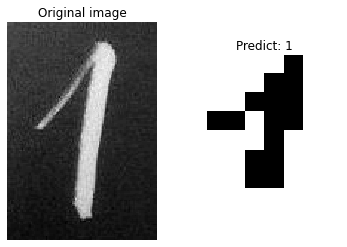

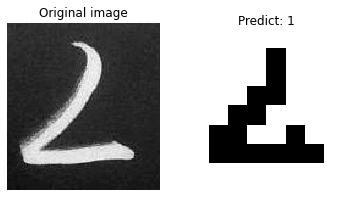

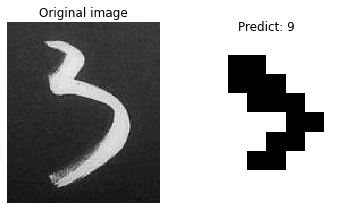

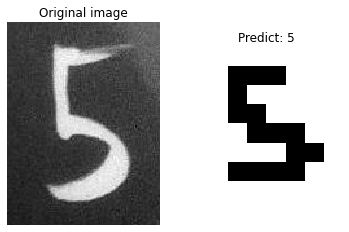

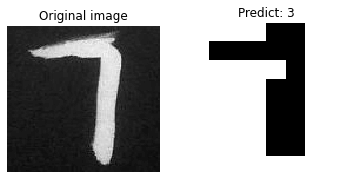

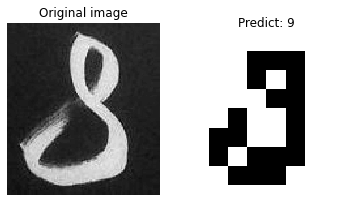

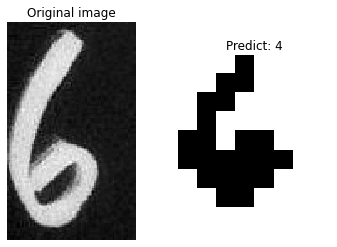

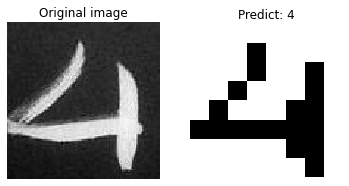

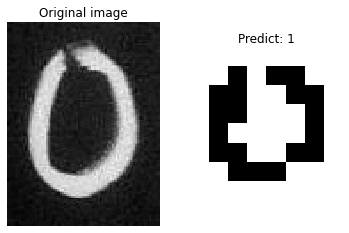

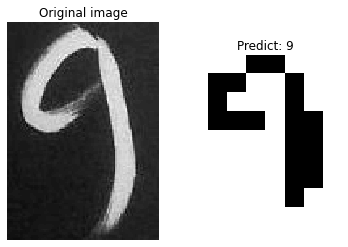

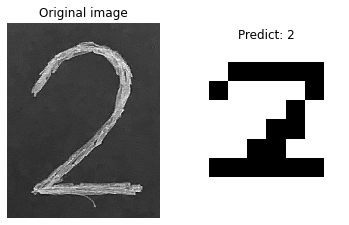

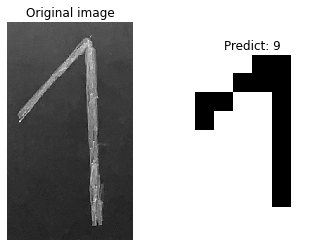

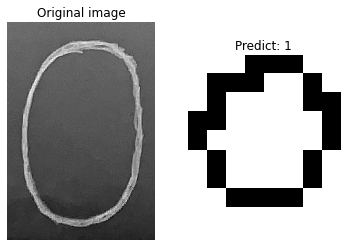

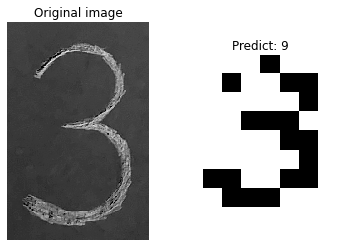

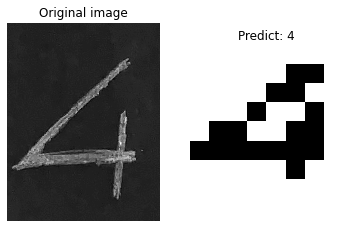

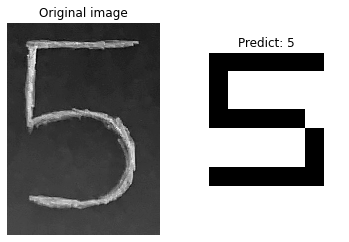

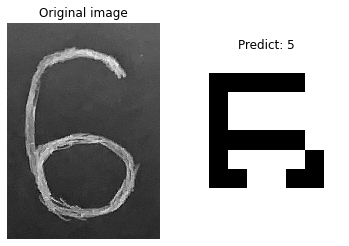

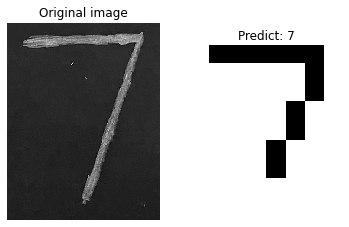

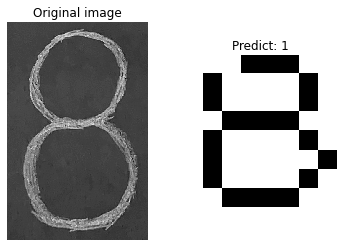

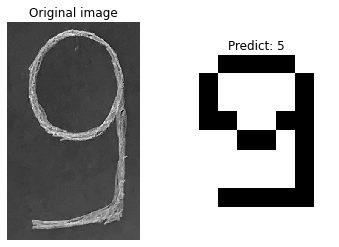

In [ ]:
pred = []
for img in images:
    pred.append(predict_webcam(img))

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(np.array(labels).reshape(-1, 1), np.array(pred).reshape(-1, 1), average='macro')

0.4047252747252748

In [ ]:
# Accuracy
np.sum(np.array(pred) == np.array(labels))/len(pred)

0.44

Confusion matrix:
[[3 0 0 2 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 1 2 1 0 0 0 1 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 4 1 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 1 0 0 0 1 3 0]
 [0 0 0 0 0 1 0 0 0 4]]


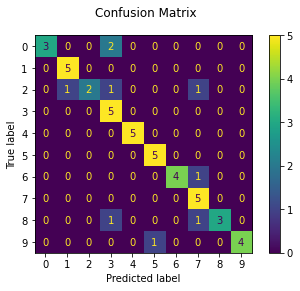

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(labels, pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# **Retrain on collective dataset**

In [ ]:
X = []
for img_path in images:
    X.append(preprocess(str(img_path)))

X = np.array(X).reshape((len(images), -1))
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [ ]:
clf.score(X_test, y_test)

0.1

In [ ]:
clf.score(X_train, y_train)

1.0

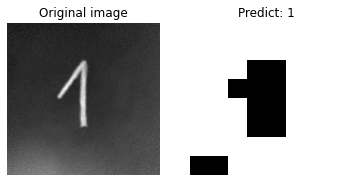

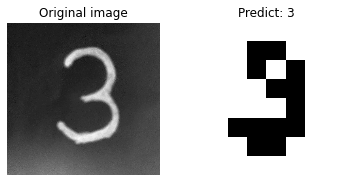

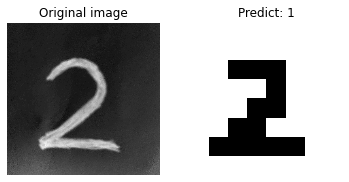

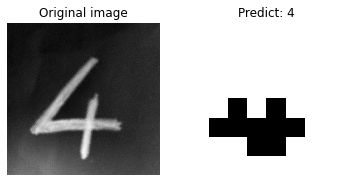

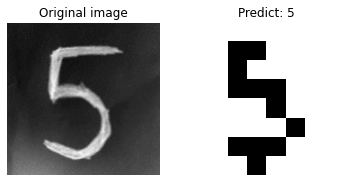

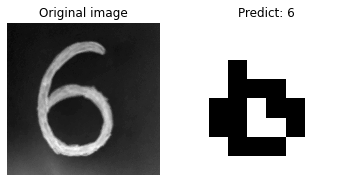

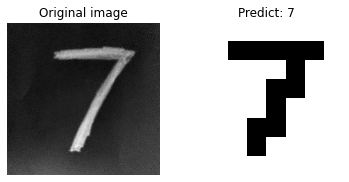

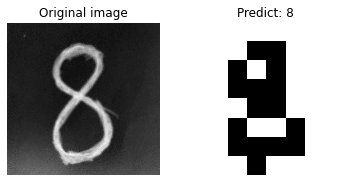

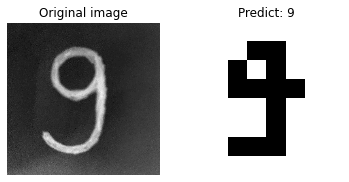

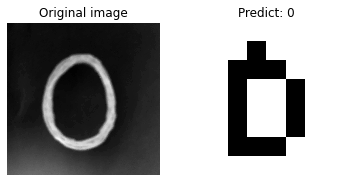

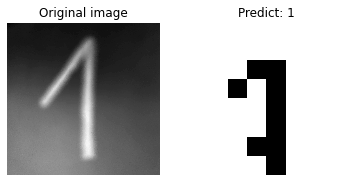

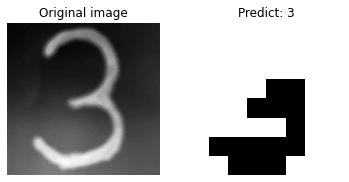

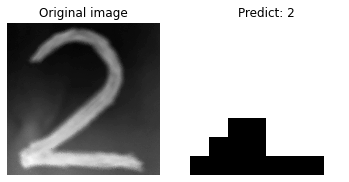

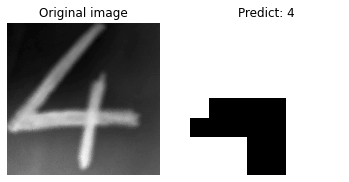

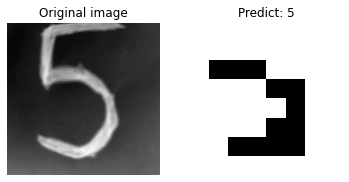

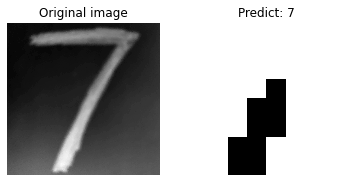

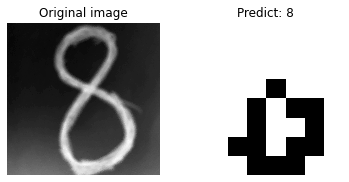

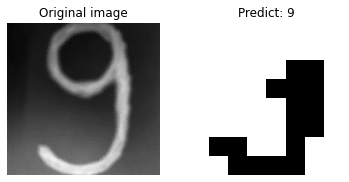

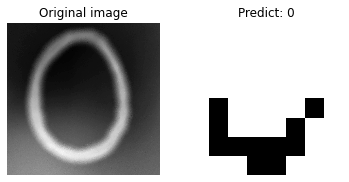

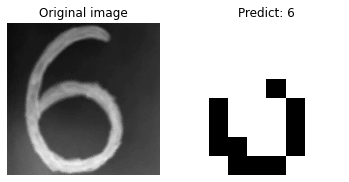

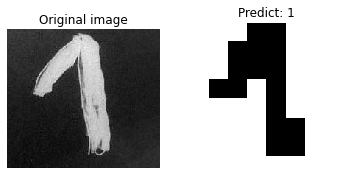

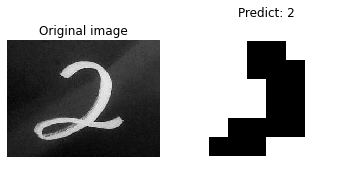

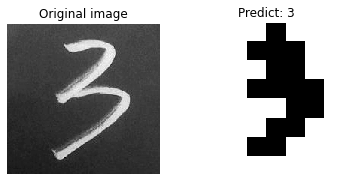

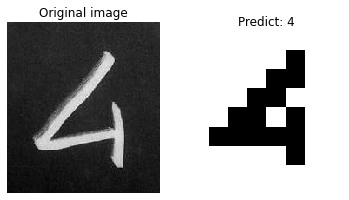

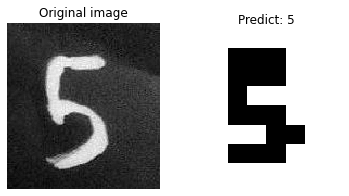

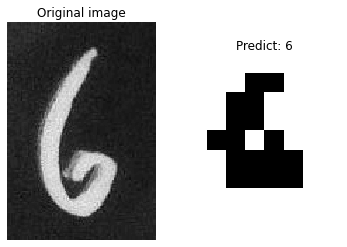

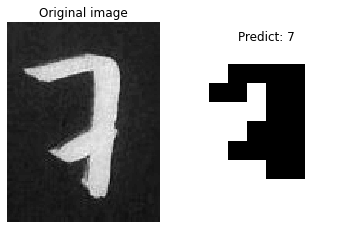

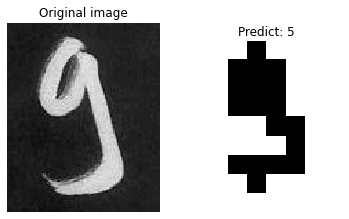

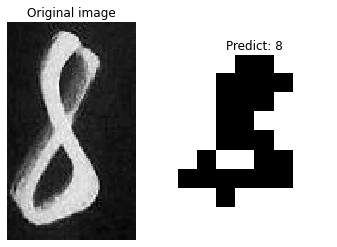

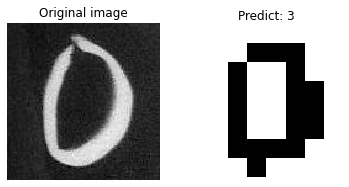

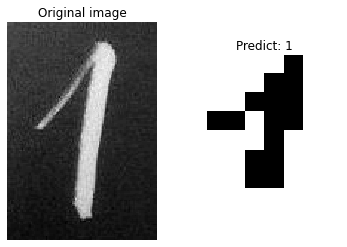

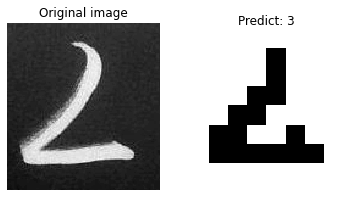

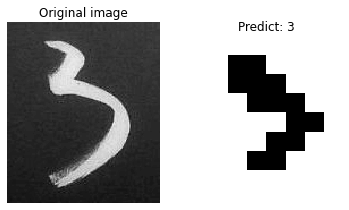

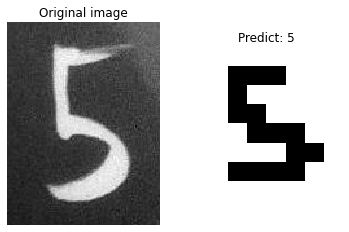

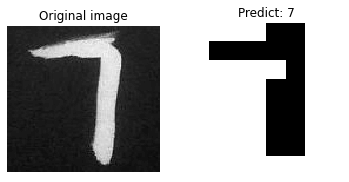

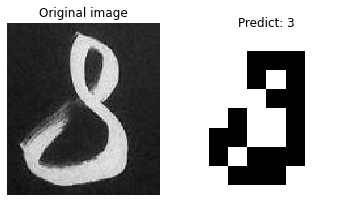

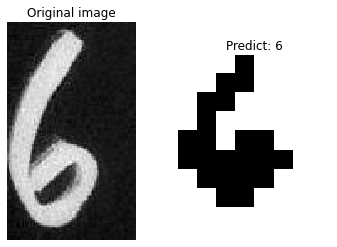

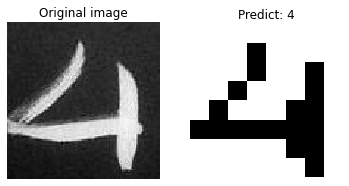

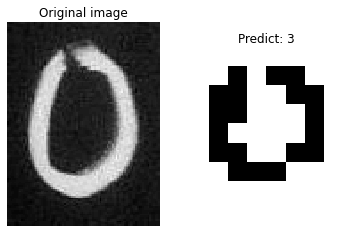

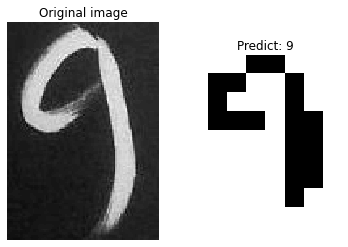

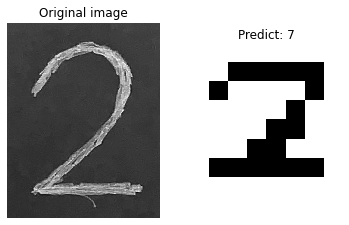

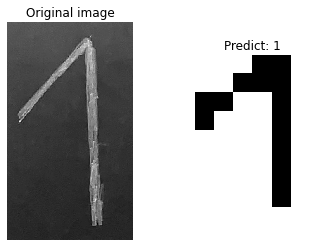

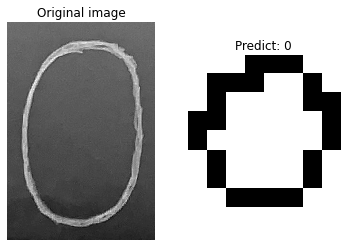

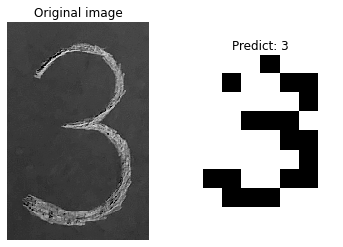

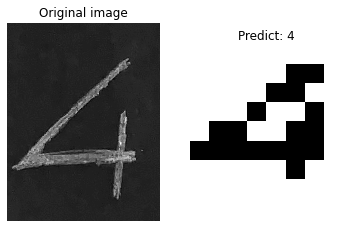

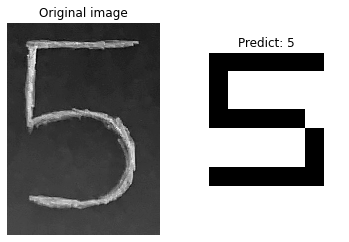

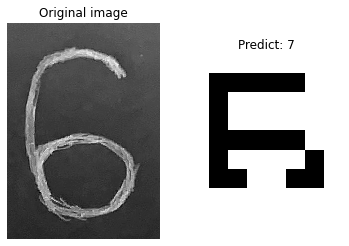

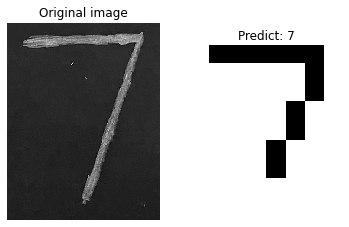

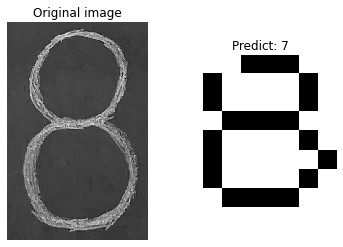

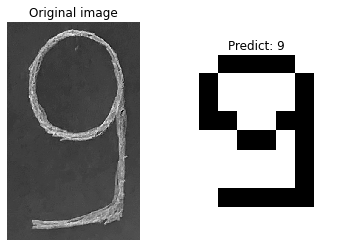

In [ ]:
pred = []
for img in images:
    pred.append(predict_webcam(img))

In [ ]:
np.sum(np.array(pred) == np.array(labels))/len(pred)

0.82